# Stock Price Forecasting


### **Overview**:

Examining stock market data is both intriguing and potentially lucrative, especially when strong predictive models can lead to significant financial rewards. Although the web is saturated with financial information, finding a well-structured dataset that captures essential stock metrics across various companies can be a challenge.

In this project, we will focus on a New York Stock Exchange dataset from Kaggle (https://www.kaggle.com/datasets/dgawlik/nyse/data), which includes critical stock price information—Open, Close, High, Low—alongside the date, symbol, and trading volume. Spanning from 2010 to the end of 2016, this dataset provides a solid foundation for our analysis.

Our goal is to explore these key metrics to identify patterns and trends that can inform our predictive models. By applying advanced analytical techniques, we aim to enhance our understanding of stock price movements and uncover actionable insights that could lead to financial success. Join us as we navigate the world of stock price prediction and leverage data-driven strategies for informed investment decisions.

### **Business Objective**:

To effectively forecast future stock price movements, our project aims to develop a predictive model that leverages historical data and relevant market indicators. The following objectives will guide our analysis:

1. **Develop a Predictive Model:** Create a robust predictive model that accurately forecasts future stock price movements using historical data and relevant market indicators.

2. **Identify Key Factors:** Analyze and identify the key factors and market indicators that significantly influence stock price movements, ensuring the model incorporates these variables.

3. **Enhance Prediction Accuracy:** Achieve a prediction accuracy of at least X% (define a specific percentage based on your goals) using metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

4. **Evaluate Techniques:** Explore various modeling techniques (e.g., ARIMA, LSTM, regression analysis) to determine the most effective approach for stock price prediction.

5. **Provide Actionable Insights:** Deliver actionable insights to stakeholders based on model predictions, enabling informed investment decisions and strategy development.

6. **Continuous Improvement:** Establish a framework for ongoing model evaluation and refinement to adapt to changing market conditions and improve prediction performance over time.


### **CRISP - DM Framework**

The Cross-Industry Standard Process for Data Mining (CRISP-DM) is a widely recognized framework that facilitates successful data science initiatives. This structured approach encompasses the following key phases:

1. **Business Understanding:** Define project objectives and requirements from a business perspective, identifying key stakeholders and their needs.

2. **Data Understanding:** Collect initial data and explore its characteristics, identifying data quality issues and assessing relevance.

3. **Data Preparation:** Clean and preprocess the data to ensure quality and consistency, transforming it into a suitable format for analysis.

4. **Modeling:** Select appropriate modeling techniques based on the problem and data characteristics, building and training models using the prepared data.

5. **Evaluation:** Assess the model's performance against established success criteria, reviewing the process to ensure all objectives have been met.

6. **Deployment:** Implement the model in a production environment, monitoring its performance over time and communicating results to stakeholders.

In this project, we will leverage the CRISP-DM framework to guide our analysis and ensure a systematic progression through each phase. By doing so, we aim to enhance our insights and achieve our objectives more effectively.


### **Business Understanding**

The primary goal of this project is to leverage time series analysis to develop predictive models that forecast stock price movements based on historical data. Understanding the business context is essential, as accurate predictions can empower investors to make informed decisions and potentially yield significant financial returns.

Throughout the analysis, we will explore various aspects of the dataset, including stock prices (Open, Close, High, Low), trading volume, and other relevant attributes. It is crucial to keep in mind the specific needs and objectives of our stakeholders—such as investors and financial analysts—to ensure that the final recommendations are relevant, practical, and aligned with their goals.

Key aspects to consider include:


*   What specific stock price trends are we aiming to predict? Clarifying whether we are focusing on daily, weekly, or monthly price movements will influence our modeling techniques and data preparation.
*  Who are the stakeholders? Identifying the needs of investors, portfolio managers, and financial analysts will help ensure that our insights are actionable.
*  What are the success criteria? Establishing performance metrics, such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE), will enable us to assess the accuracy and reliability of our time series forecasts..


We extend our gratitude to Kaggle for providing access to the New York Stock Exchange dataset (https://www.kaggle.com/datasets/dgawlik/nyse/data), which serves as the foundation for our analysis. By clearly defining the business understanding, we can align our analytical efforts to enhance market insights and drive financial success through effective time series forecasting.

### **Data Understanding: Exploratory Data Analysis (EDA)**

*   Load and Read DataSet
*   Understand Features and Datatype
*   Analyse Data and Statistics
*   Visualization
*   Decomposition & Autocorelation







### About Dataset
The stocks dataset contains total 7 features/variables including target variable named close. Here's brief about each feature:

 *   date: Date for a stock          
 *   symbol: Stock's ticker name        
 *   open: Price of a stock when market open          
 *   close: Price of a stock when market close          
 *   low: lowest price reached in a day for a stock   
 *   high: lowest price reached in a day for a stock          
 *   volume : Number of traded shares       


In [1]:
# Install package #
!pip install prophet

In [2]:
# import packages #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import time
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

In [3]:
# read data #
stocks_df = pd.read_csv('prices.csv')

In [4]:
# display top rows #
stocks_df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
# dataset information #
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [6]:
# statistics about dataset #
stocks_df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,851264.0,7.083699e+01,8.369588e+01,0.85,3.384000e+01,5.277000e+01,7.988000e+01,1.584440e+03
close,851264.0,7.085711e+01,8.368969e+01,0.86,3.385000e+01,5.280000e+01,7.989000e+01,1.578130e+03
low,851264.0,7.011841e+01,8.287729e+01,0.83,3.348000e+01,5.223000e+01,7.911000e+01,1.549940e+03
high,851264.0,7.154348e+01,8.446550e+01,0.88,3.419000e+01,5.331000e+01,8.061000e+01,1.600930e+03
volume,851264.0,5.415113e+06,1.249468e+07,0.00,1.221500e+06,2.476250e+06,5.222500e+06,8.596434e+08


In [7]:
# shape of the dataset : columns / rows #
stocks_df.shape

(851264, 7)

In [8]:
# list of symbols #
stocks_df['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [9]:
# total symbols #
stocks_df['symbol'].nunique()

501

In [10]:
# Determine no. of samples for each symbol #
stocks_df['symbol'].value_counts()

,count
symbol,
KSU,1762
NOC,1762
ORCL,1762
OMC,1762
OKE,1762
...,...
KHC,378
HPE,304
CSRA,284


In [11]:
# min and max date of dataset #
stocks_df['date'].min(), stocks_df['date'].max()

('2010-01-04', '2016-12-30 00:00:00')

In [12]:
# analyse why certain symbols have less samples #
stocks_df[stocks_df['symbol'] == 'KHC']['date'].min(), stocks_df[stocks_df['symbol'] == 'KHC']['date'].max()

('2015-07-06', '2016-12-30')

In [13]:
# min and max date of symbol (Amazon) having 1762 #
stocks_df[stocks_df['symbol'] == 'PFE']['date'].min(), stocks_df[stocks_df['symbol'] == 'AMZN']['date'].max(), stocks_df[stocks_df['symbol'] == 'PFE'].shape

('2010-01-04', '2016-12-30', (1762, 7))

In [14]:
# min and max date of symbol (Google) having 1762 #
stocks_df[stocks_df['symbol'] == 'GOOG']['date'].min(), stocks_df[stocks_df['symbol'] == 'GOOG']['date'].max(), stocks_df[stocks_df['symbol'] == 'GOOG'].shape

('2010-01-04', '2016-12-30', (1762, 7))

In [15]:
# min and max date of symbol (Microsoft) having 1762 #
stocks_df[stocks_df['symbol'] == 'MSFT']['date'].min(), stocks_df[stocks_df['symbol'] == 'MSFT']['date'].max(), stocks_df[stocks_df['symbol'] == 'MSFT'].shape

('2010-01-04', '2016-12-30', (1762, 7))

In [16]:
# min and max date of symbol (Apple) having 1762 #
stocks_df[stocks_df['symbol'] == 'AAPL']['date'].min(), stocks_df[stocks_df['symbol'] == 'AAPL']['date'].max(), stocks_df[stocks_df['symbol'] == 'AAPL'].shape

('2010-01-04', '2016-12-30', (1762, 7))

In [17]:
# min and max date of symbol (Oracle) having 1762 #
stocks_df[stocks_df['symbol'] == 'ORCL']['date'].min(), stocks_df[stocks_df['symbol'] == 'ORCL']['date'].max(), stocks_df[stocks_df['symbol'] == 'ORCL'].shape

('2010-01-04', '2016-12-30', (1762, 7))

#### Analyze Amazon Stock

In [18]:
amazon_df = stocks_df[stocks_df['symbol'] == 'AMZN']
amazon_df['date'] = pd.to_datetime(amazon_df['date'])
amazon_df.drop('symbol', axis = 1, inplace=True)
amazon_df.head()

,date,open,close,low,high,volume
284,2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,130.559998,133.520004,129.029999,133.679993,9830500.0


In [19]:
px.line(amazon_df,x="date",y=["high","low"],title="Difference between high and low prices of Amazon stock")

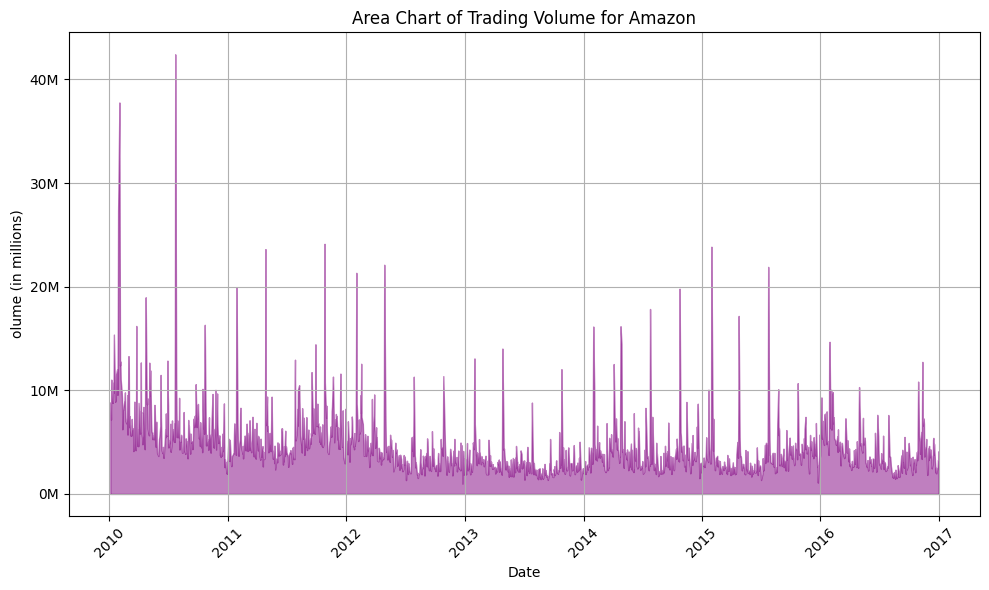

In [20]:
# Plot area chart of volume by date #
plt.figure(figsize=(10, 6))
plt.fill_between(amazon_df['date'], amazon_df['volume'], color='purple', alpha=0.5)

# format Y-axis to show values in thousands #
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000000)}M'))

plt.title('Area Chart of Trading Volume for Amazon')
plt.xlabel('Date')
plt.ylabel('olume (in millions)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

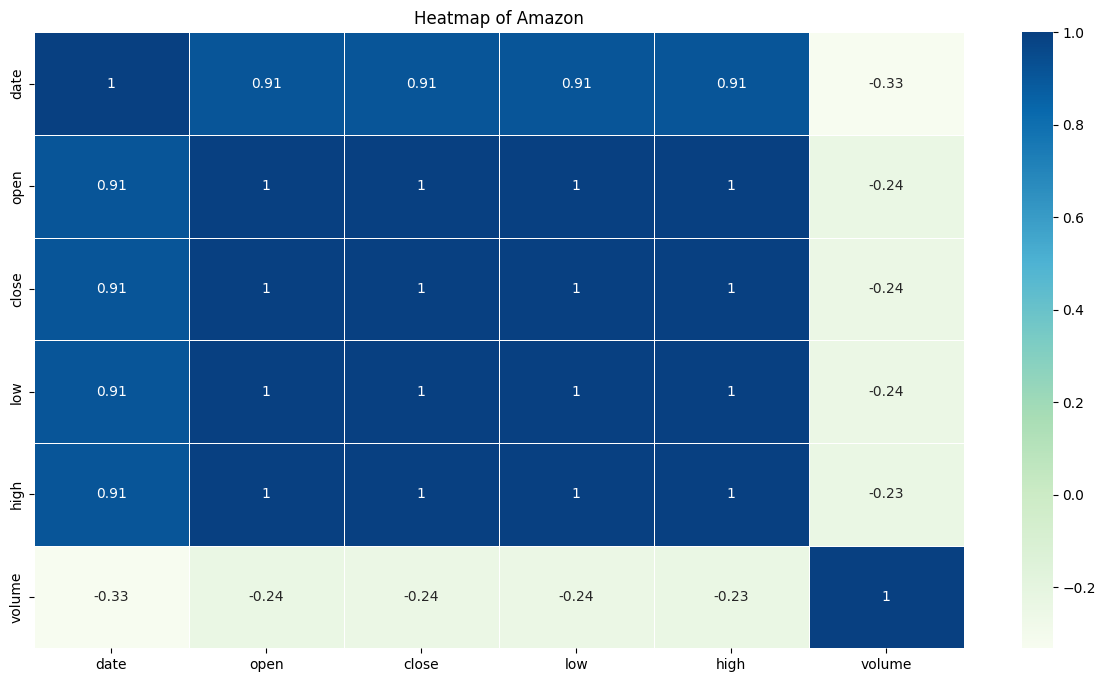

In [21]:
# heat map to show corelation #
fig=plt.figure(figsize=(15,8))
sns.heatmap(amazon_df.corr(), annot=True, cmap='GnBu', linecolor='white', linewidth=0.5)
plt.title('Heatmap of Amazon')
plt.show()

In [22]:
amazon_df.set_index('date', inplace=True)
amazon_df.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0
2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0
2010-01-06,134.600006,132.250000,131.649994,134.729996,7178800.0
2010-01-07,132.009995,130.000000,128.800003,132.320007,11030200.0
2010-01-08,130.559998,133.520004,129.029999,133.679993,9830500.0


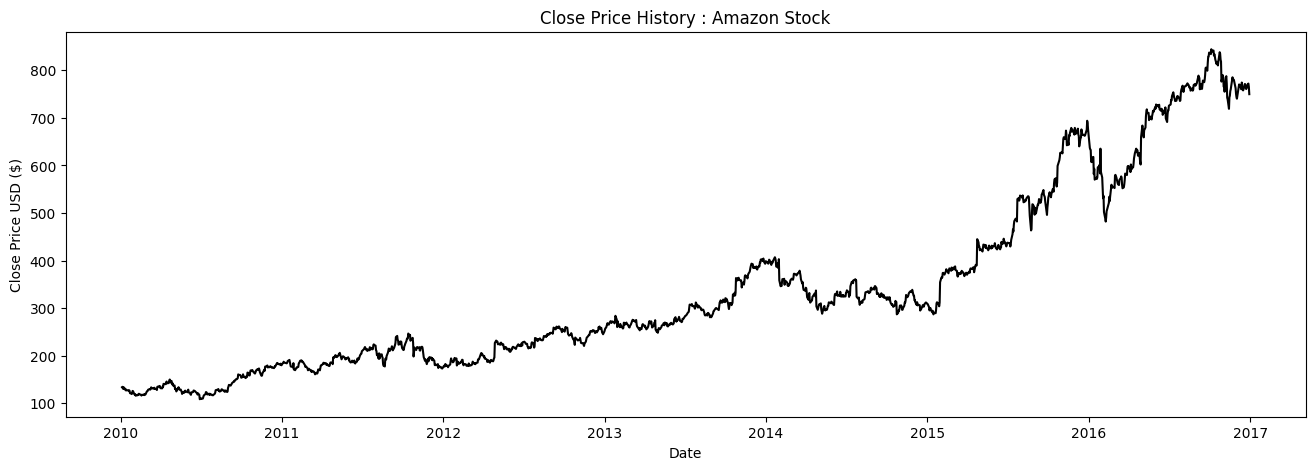

In [23]:
plt.figure(figsize=(16,5))
plt.plot(amazon_df['close'],'k')
plt.title('Close Price History : Amazon Stock')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

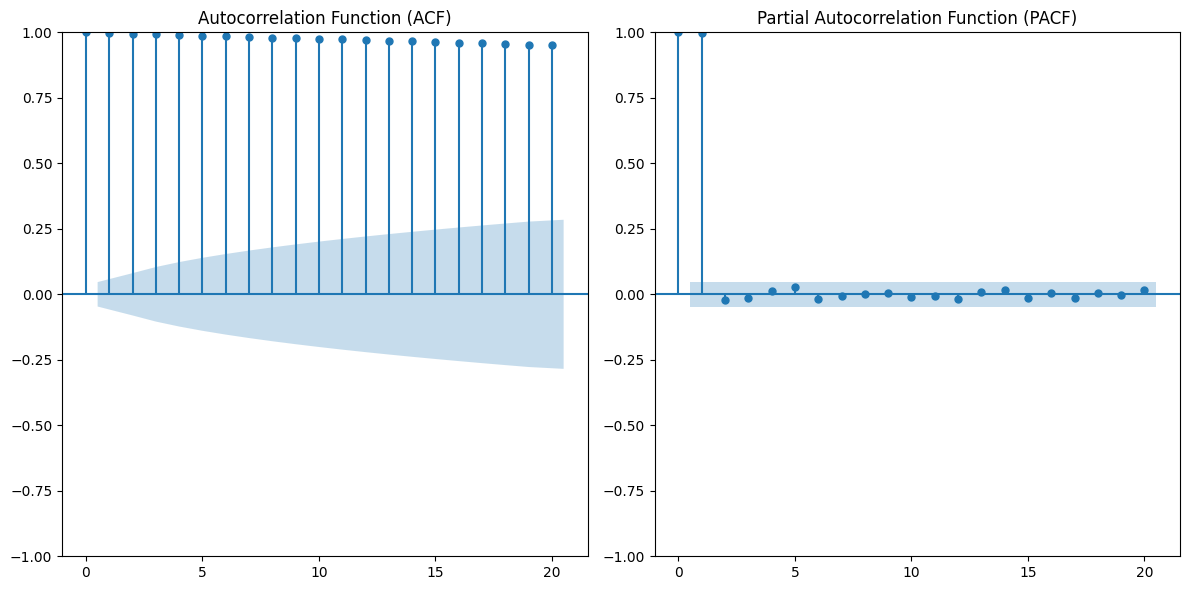

In [24]:
# Plot ACF #
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(amazon_df['close'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF #
plt.subplot(1, 2, 2)
plot_pacf(amazon_df['close'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#### Seasonal decompose

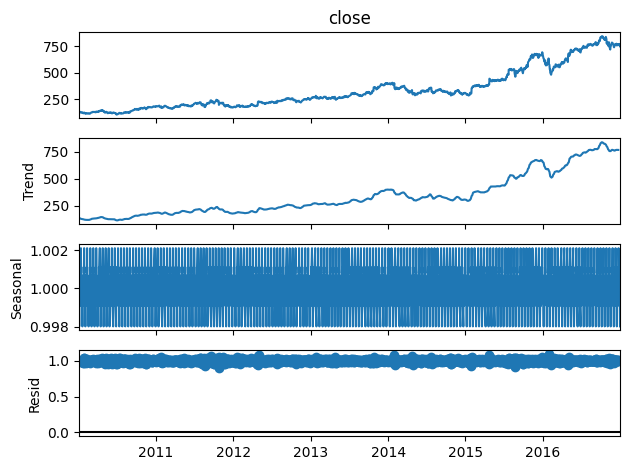

In [25]:
# multiplicative seasonal decompose #
fig = seasonal_decompose(amazon_df[amazon_df['close'] > 0]['close'], model='multiplicative',period=10).plot()
fig.show()

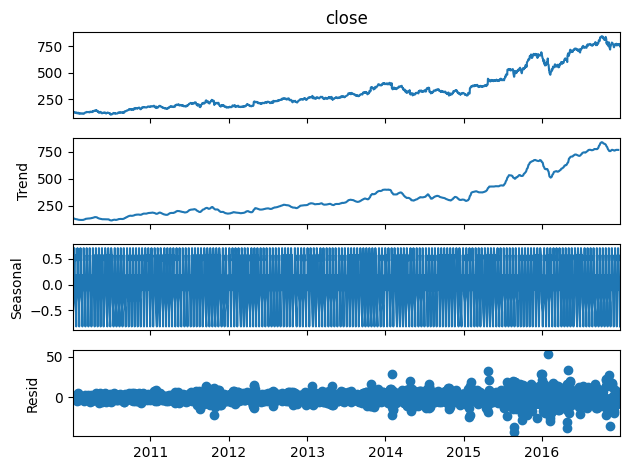

In [26]:
# additive seasonal decompose #
fig = seasonal_decompose(amazon_df[amazon_df['close'] > 0]['close'], model='additive',period=10).plot()
fig.show()

### Trend Analysis

In [27]:
train_size = int(len(amazon_df) * 0.85)
X_train = amazon_df[:train_size]
X_test = amazon_df[train_size:]

In [28]:
period = 100

filt = np.ones(period+1)
filt[0] = 0.5
filt[-1] = 0.5
filt /= period
sum(filt)

1.0000000000000007

In [31]:
from statsmodels.tsa.seasonal import _extrapolate_trend
trend = convolution_filter(X_train['close'], filt)
trend = _extrapolate_trend(trend, period + 1)

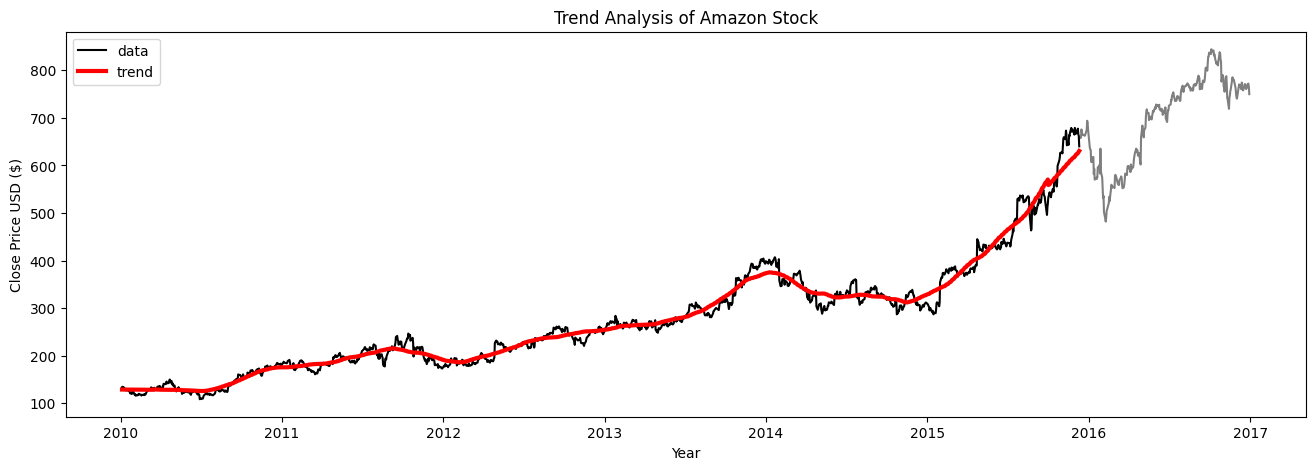

In [32]:
plt.figure(figsize=(16,5))
plt.plot(X_train['close'], 'k',label='data')
plt.plot(trend,'r',linewidth=3,label='trend')
plt.plot(X_test['close'],'k',alpha=0.5)
plt.title('Trend Analysis of Amazon Stock')
plt.xlabel('Year')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()


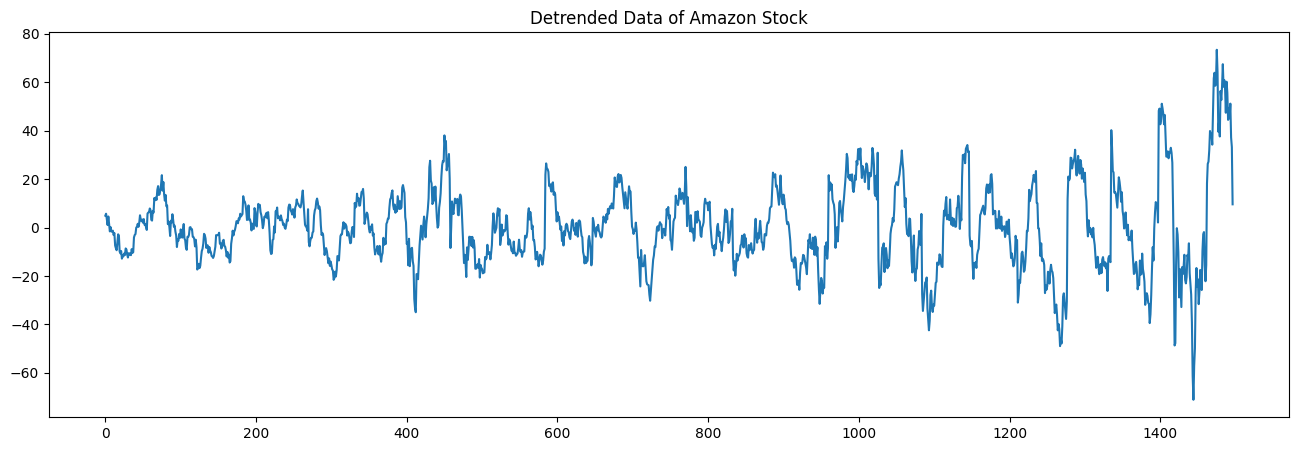

In [33]:
detrended = X_train['close'] - trend
detrended = detrended.to_numpy()
plt.figure(figsize=(16,5))
plt.plot(detrended)
plt.title('Detrended Data of Amazon Stock')
plt.show()

#**Data Preparation**

*   Handle Outliers, correct data types
*   Handle Missing Values
*   Drop features & duplicates
*   Feature Encoding
*   Handling inconsistent data (example: price shouldn't be less than 1)
*   Visualize cleaned Data

In [34]:
# setup stocks #
stocks_new_df = stocks_df.copy()

In [35]:
# data type check #
stocks_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


#### Outliers

In [36]:
# drop records not in a desired date format #
date_format = "%Y-%m-%d"
stocks_new_df['date'] = pd.to_datetime(stocks_new_df['date'], format=date_format, errors='coerce')
stocks_new_df = stocks_new_df.dropna(subset=['date'])

In [37]:
# Calculate z-scores for each column individually #
z_scores = stocks_new_df[['open', 'close', 'low', 'high', 'volume']].apply(stats.zscore)
stocks_new_df['z_score'] = np.mean(z_scores, axis=1)
outliers = stocks_new_df[stocks_new_df['z_score'] > 3]
stocks_new_df.drop('z_score', axis=1, inplace=True)

#### Missing Values & Duplicate Records

In [38]:
# missing values ??? #
print('Missing Values:\n', stocks_new_df.isnull().sum())
print('Missing Values %: \n', stocks_new_df.isnull().sum() / stocks_df.count() * 100)

Missing Values:
 date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing Values %: 
 date      0.0
symbol    0.0
open      0.0
close     0.0
low       0.0
high      0.0
volume    0.0
dtype: float64


In [39]:
print(f"Total duplicate rows: {stocks_new_df.duplicated().sum()}")

Total duplicate rows: 0


#### Handle Inconsistent Values

In [40]:
# ignore negative value records #
stocks_new_df = stocks_new_df[(stocks_new_df[['open', 'close', 'low', 'high', 'volume']] >= 0).all(axis=1)]
stocks_new_df

,date,symbol,open,close,low,high,volume
251,2010-01-04,A,31.389999,31.300001,31.130000,31.630001,3815500.0
252,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0
253,2010-01-04,AAP,40.700001,40.380001,40.360001,41.040001,1701700.0
254,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
255,2010-01-04,ABC,26.290001,26.629999,26.139999,26.690001,2455900.0
...,...,...,...,...,...,...,...
851257,2016-12-30,YHOO,38.720001,38.669998,38.430000,39.000000,6431600.0
851258,2016-12-30,YUM,63.930000,63.330002,63.160000,63.939999,1887100.0
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0


### Select & Split the data

In [41]:
# select symbol / ticker #
symbol = 'AMZN'
stock = stocks_new_df[stocks_new_df['symbol'] == symbol]
stock['date'] = pd.to_datetime(stock['date'])
stock.drop('symbol', axis = 1, inplace=True)
stock.set_index('date', inplace=True)
stock.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0
2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0
2010-01-06,134.600006,132.250000,131.649994,134.729996,7178800.0
2010-01-07,132.009995,130.000000,128.800003,132.320007,11030200.0
2010-01-08,130.559998,133.520004,129.029999,133.679993,9830500.0


In [42]:
train_size = int(len(stock) * 0.85)
X_train = stock[:train_size]
X_test = stock[train_size:]

### Visualize selected Clean Symbol

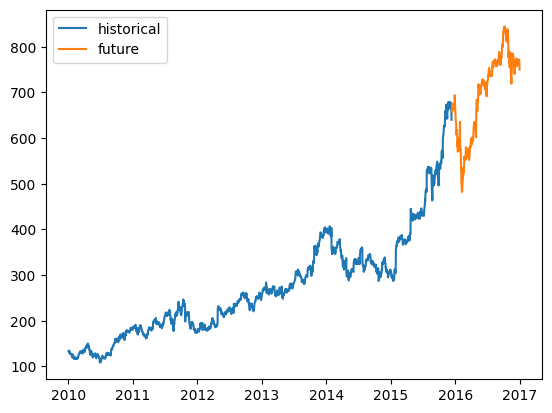

In [43]:
plt.plot(X_train['close'], label = 'historical')
plt.plot(X_test['close'], label = 'future')
plt.legend();

# **Modeling**

We are going to analyse the data against various models through different hyperparameters and perform cross validation to determine the best suited model for a dataset. The models used in current applications are:


*   ARIMA
*   SARIMA
*   Prophet
*   LSTM (Long Short- Term Memory)

In [56]:
train = X_train[['close']]
test = X_test[['close']]

In [65]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [66]:
train_scaled

array([[-1.20259773],
       [-1.19582304],
       [-1.21674721],
       ...,
       [ 3.35003513],
       [ 3.32885396],
       [ 3.13873586]])

In [69]:
# ARIMA Model #
arma = ARIMA(train, order=(1, 1, 1)).fit()
arima_train_preds = arma.predict()
arima_test_preds = arma.forecast(len(test))
arima_test_preds.index = test.index

In [70]:
# SARIMA Model #
sarima = SARIMAX(train, order=(1, 1, 1),seasonal_order=(1, 1, 1, 12)).fit()
sarima_train_preds = sarima.predict()
sarima_test_preds = sarima.forecast(len(test))
sarima_test_preds.index = test.index

In [71]:
# Prophet Model #
prophet_train = pd.DataFrame(train)
prophet_train.reset_index(inplace=True)
prophet_train.columns = ['ds', 'y']
prophet_test = pd.DataFrame(test)
prophet_test.reset_index(inplace=True)
prophet_test.columns = ['ds', 'y']
prophet = Prophet()
prophet.fit(prophet_train)
prophet_test_df = prophet.make_future_dataframe(periods=len(prophet_test)) # 180 more days #
prophet_test_preds = prophet.predict(prophet_test_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdp0bt3ai/lqhnftjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdp0bt3ai/d8jr2wyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51711', 'data', 'file=/tmp/tmpdp0bt3ai/lqhnftjz.json', 'init=/tmp/tmpdp0bt3ai/d8jr2wyw.json', 'output', 'file=/tmp/tmpdp0bt3ai/prophet_modelg4_pgiz8/prophet_model-20240907213503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:35:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:35:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


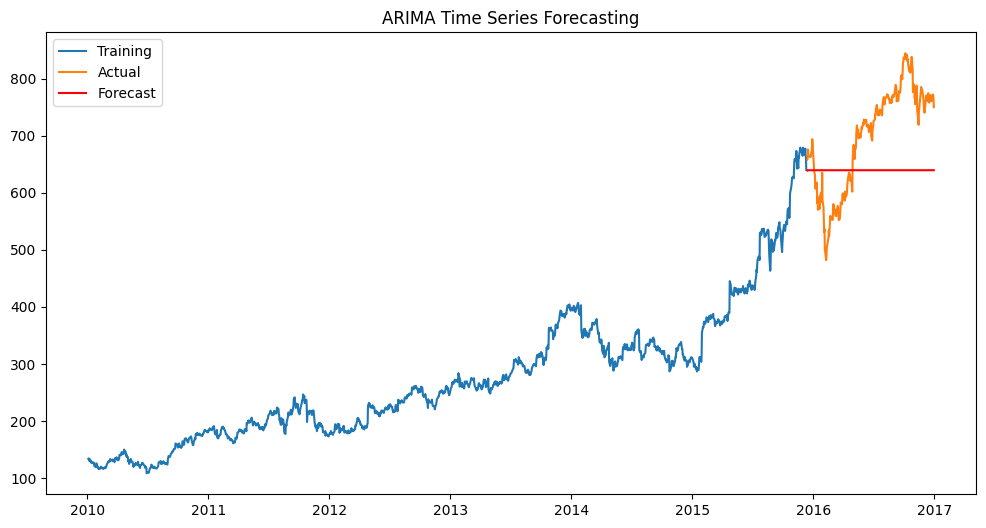

In [60]:
# Plot the ARIMA results #
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(arima_test_preds, label='Forecast', color='red')
plt.title('ARIMA Time Series Forecasting')
plt.legend()
plt.show()

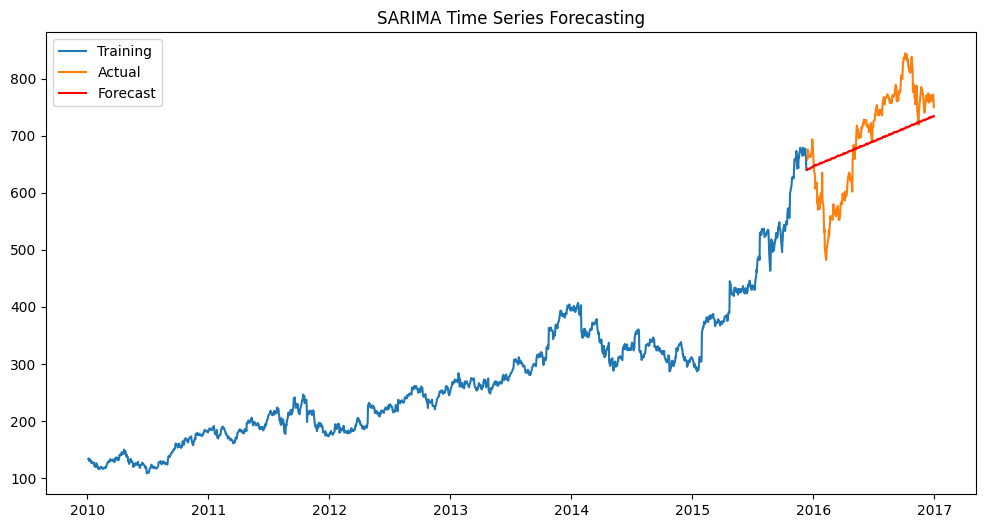

In [61]:
# Plot the SARIMA results #
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(sarima_test_preds, label='Forecast', color='red')
plt.title('SARIMA Time Series Forecasting')
plt.legend()
plt.show()

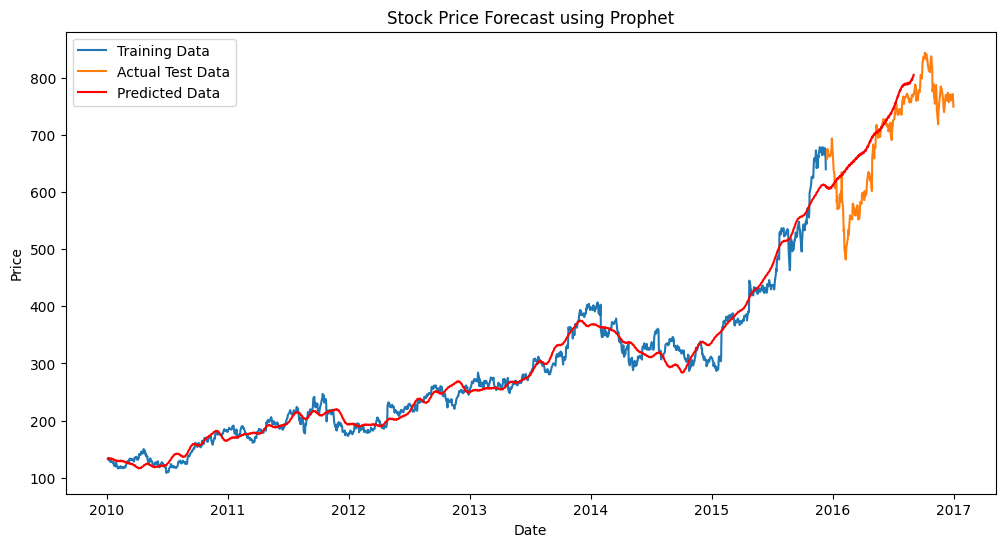

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(prophet_train['ds'], prophet_train['y'], label='Training Data')
plt.plot(prophet_test['ds'], prophet_test['y'], label='Actual Test Data')
plt.plot(prophet_test_preds['ds'], prophet_test_preds['yhat'], label='Predicted Data', color='red')
plt.title('Stock Price Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [63]:
# Calculate performance metrics #
arma_rmse = np.sqrt(mean_squared_error(X_test['close'], arima_test_preds))
sarima_rmse = np.sqrt(mean_squared_error(X_test['close'], sarima_test_preds))

arma_mae = mean_absolute_error(X_test['close'], arima_test_preds)
sarima_mae = mean_absolute_error(X_test['close'], sarima_test_preds)

# Print performance metrics
print(f'ARMA RMSE: {arma_rmse}, MAE: {arma_mae}')
print(f'SARIMA RMSE: {sarima_rmse}, MAE: {sarima_mae}')

ARMA RMSE: 107.51625905738496, MAE: 95.94877487188812
SARIMA RMSE: 70.02654534538559, MAE: 60.57419421239814


In [72]:
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1497
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4797.734
Date:                Sat, 07 Sep 2024   AIC                           9601.469
Time:                        21:35:41   BIC                           9617.400
Sample:                             0   HQIC                          9607.405
                               - 1497                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5324      0.337     -1.580      0.114      -1.193       0.128
ma.L1          0.5698      0.330      1.726      0.084      -0.077       1.217
sigma2        35.7383      0.459     77.811      0.000      34.838      36.638
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):             15312.62
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               4.29   Skew:                             0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              close   No. Observations:                 1497
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4780.391
Date:                            Sat, 07 Sep 2024   AIC                           9570.781
Time:                                    21:36:23   BIC                           9597.294
Sample:                                         0   HQIC                          9580.663
                                           - 1497                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4833      0.414     -1.168      0.243      -1.294       0.328
ma.L1          0.5198      0.405      1.282      0.200      -0.275       1.315
ar.S.L12      -0.0532      0.027     -1.941      0.052      -0.107       0.001
ma.S.L12      -0.9966      0.027    -36.580      0.000      -1.050      -0.943
sigma2        35.4452      0.901     39.322      0.000      33.678      37.212
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             14537.94
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               4.30   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
# LSTM Model #
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# **Evaluation**

Once we have determined the best suited model (Ridge Regression Model), we are going to perform following:

*   Predict the Price against Test Dataset (Actual vs Predicted)
*   Model Indicators i.e., MSE, RSME, R2 Score
*   Coefficients and Intercept
*   Visualize Actual Vs Predicted
*   Visualize against each Independent Variables

### **Deployment**

*   Save the trained model to a file for future use.
*   Load the saved model and use it to make predictions on new data.
*   Create the API, train model on new ticker/symbol and make predictions on new data.


# **Key Highlights**



*   List item
*   List item



# **Next steps and Recommendations**




*   List item
*   List item






